<a href="https://colab.research.google.com/github/kacperkurowski/CE888/blob/master/Assignment/Sberbank-Russian-Housing-Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

In [1]:
import os
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
os.environ['KAGGLE_USERNAME'] = "kacperkurowski" # username from the json file

os.environ['KAGGLE_KEY'] = "7c927dd985620db03df77b3804e71a95" # key from the json file

##1.Loading Data

In [3]:
!kaggle competitions download -c sberbank-russian-housing-market # api copied from kaggle

  0% 0.00/4.46M [00:00<?, ?B/s]
100% 4.46M/4.46M [00:00<00:00, 41.0MB/s]
  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 65.1MB/s]
  0% 0.00/18.6k [00:00<?, ?B/s]
100% 18.6k/18.6k [00:00<00:00, 17.8MB/s]
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 26.8MB/s]
 88% 15.0M/17.1M [00:00<00:00, 17.9MB/s]
100% 17.1M/17.1M [00:00<00:00, 20.7MB/s]


##Uploading The Data

In [4]:
from zipfile import ZipFile
file_name = "/content/test.csv.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')


file_name = "/content/train.csv.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done
done


extracting all the data from the zip file

##1.Removing Files that are not used

In [0]:
#!rm sample_submission.csv.zip
#!ls

##Loading the files

In [6]:
import pandas as pd

df_test = pd.read_csv("test.csv", header = 0, sep = ',', quotechar = '"')

print(df_test)

df_train = pd.read_csv("train.csv", header = 0, sep = ',', quotechar = '"')

print(df_train)

         id   timestamp  ...  sport_count_5000  market_count_5000
0     30474  2015-07-01  ...                14                  1
1     30475  2015-07-01  ...                12                  1
2     30476  2015-07-01  ...                71                 11
3     30477  2015-07-01  ...                 2                  0
4     30478  2015-07-01  ...                11                  1
...     ...         ...  ...               ...                ...
7657  38131  2016-05-26  ...                75                 12
7658  38132  2016-05-28  ...                 0                  0
7659  38133  2016-05-30  ...               203                 13
7660  38134  2016-05-30  ...                43                 10
7661  38135  2016-05-30  ...                42                 11

[7662 rows x 291 columns]
          id   timestamp  ...  market_count_5000  price_doc
0          1  2011-08-20  ...                  4    5850000
1          2  2011-08-23  ...                 14    6000000
2

##Handling Missing Values (NA to 0, or mean)

In [0]:
for i in df_train.columns:
    if df_train[i].dtype == 'object':
      df_train[i] = df_train[i].fillna(df_train[i].mode().iloc[0])
    if (df_train[i].dtype == 'int' or df_train[i].dtype == 'float'):
      df_train[i] = df_train[i].fillna(np.mean(df_train[i]))

for i in df_test.columns:
    if df_test[i].dtype == 'object':
      df_test[i] = df_test[i].fillna(df_test[i].mode().iloc[0])
    if (df_test[i].dtype == 'int' or df_test[i].dtype == 'float'):
      df_test[i] = df_test[i].fillna(np.mean(df_test[i]))

If there are gaps in the data, such as N/A, these values are replaced with a 0 or the mean of the column to make the data usable.

##Changing String to Numeric Values

In [0]:
from sklearn import preprocessing
## Label encoding
number = preprocessing.LabelEncoder()
for i in df_train.columns:
    if (df_train[i].dtype == 'object'):
      df_train[i] = number.fit_transform(df_train[i].astype('str'))
      df_train[i] = df_train[i].astype('object')

for i in df_test.columns:
    if (df_test[i].dtype == 'object'):
      df_test[i] = number.fit_transform(df_test[i].astype('str'))
      df_test[i] = df_test[i].astype('object')

As the data is required to be numeric, any strings are replaced with either a 0, or the mean of the column to assure the data is usable and has a minimal effect on the outcome.

##Plotting Histogram of Sberbank-Russian-Housing-Market Train Data

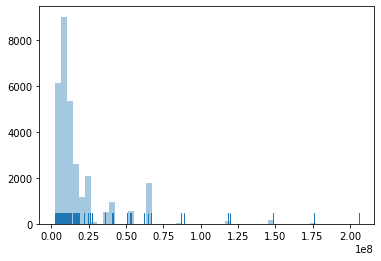

In [9]:
y_df = df_train["area_m"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Plotting Histogram of Sberbank-Russian-Housing-Market Test Data      CHECK

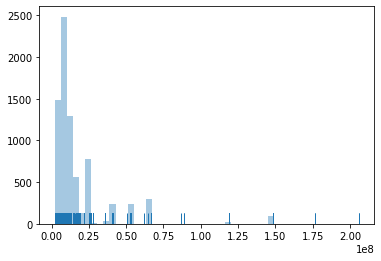

In [10]:
y_df = df_test["area_m"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Adding Test Columns for testing Covariate Shift

In [11]:
df_train.drop(columns=['id', 'price_doc'], inplace=True)
df_test.drop(columns=['id'], inplace=True)
df_train['is_test'] = 0
df_test['is_test'] = 1

print(df_train.head())
print(df_test.head())

  timestamp  full_sq  life_sq  ...  sport_count_5000  market_count_5000  is_test
0         0       43     27.0  ...                52                  4        0
1         1       34     19.0  ...                66                 14        0
2         2       43     29.0  ...                67                 10        0
3         3       89     50.0  ...                26                  3        0
4         4       77     77.0  ...               195                 14        0

[5 rows x 291 columns]
  timestamp  full_sq    life_sq  ...  sport_count_5000  market_count_5000  is_test
0         0     39.0  20.700000  ...                14                  1        1
1         0     79.2  32.660037  ...                12                  1        1
2         0     40.5  25.100000  ...                71                 11        1
3         0     62.8  36.000000  ...                 2                  0        1
4         0     40.0  40.000000  ...                11                  1  

##Randomising Test and Train Data Sets

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

df = pd.concat([df_train, df_test], axis = 0)
#df = df.drop(columns =['is_test'])
#X = df.drop(columns=['is_test'])
y = df['is_test'].values
x = df.drop(columns = ['is_test'])
#y = df['is_test']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)
print('train shape:', X_train.shape, 'test shape:', X_test.shape)

train shape: (26693, 290) test shape: (11440, 290)


In [18]:
pip install scikit-plot

##Checking if data can be classified (checking for covariate shift)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


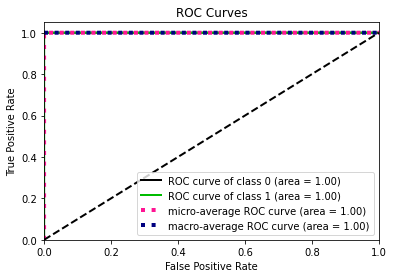

AUC score:  1.0


In [23]:
##Random Forest as Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test_score = rfc.predict_proba(X_test)

import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

skplt.metrics.plot_roc_curve(y_test, y_test_score)
plt.show()


##AUC score shows heavy covariate data
print('AUC score: ', round(roc_auc_score(y_true=y_test, y_score=y_test_score[:,1]), 4))

In [26]:
m = RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf = 5)
predictions = np.zeros(y.shape)

skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=100)
for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
  X_train, X_test = x[train_idx], x[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  m.fit(X_train, y_train)
  probs = m.predict_proba(X_test)[:, 1] #calculating the probability
  predictions[test_idx] = probs

ERROR! Session/line number was not unique in database. History logging moved to new session 59


KeyError: ignored

##Finding Drifting Features

In [0]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators = 10000, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in X.columns:
    score = cross_val_score(model,pd.DataFrame(X[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

life_sq 0.8181737301572634


KeyboardInterrupt: ignored

##Dropping Drifting Features

In [0]:
drop_list.append('is_test')
X = df.drop(columns=drop_list)
print(X)

##Randomising combines Data set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('train shape:', X_train.shape, 'test shape:', X_test.shape)

##Checking if data can be classified (checking for covariate shift)

In [0]:
##Random Forest as Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test_score = rfc.predict_proba(X_test)

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, y_test_score)
plt.show()


##AUC score shows heavy covariate data
print('AUC score: ', round(roc_auc_score(y_true=y_test, y_score=y_test_score[:,1]), 4))